In [ ]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/masinsko/

Mounted at /content/drive/
/content/drive/My Drive/masinsko


Test example: 1/30 | Predicted: 1 | Actual: 1 | Match: True
Test example: 11/30 | Predicted: 1 | Actual: 2 | Match: False
Test example: 21/30 | Predicted: 0 | Actual: 0 | Match: True
Accuracy for k=1: 0.7333333333333333
Test example: 1/30 | Predicted: 1 | Actual: 1 | Match: True
Test example: 11/30 | Predicted: 1 | Actual: 2 | Match: False
Test example: 21/30 | Predicted: 0 | Actual: 0 | Match: True
Accuracy for k=2: 0.8
Test example: 1/30 | Predicted: 1 | Actual: 1 | Match: True
Test example: 11/30 | Predicted: 2 | Actual: 2 | Match: True
Test example: 21/30 | Predicted: 0 | Actual: 0 | Match: True
Accuracy for k=3: 0.8666666666666667
Test example: 1/30 | Predicted: 1 | Actual: 1 | Match: True
Test example: 11/30 | Predicted: 2 | Actual: 2 | Match: True
Test example: 21/30 | Predicted: 0 | Actual: 0 | Match: True
Accuracy for k=4: 0.7666666666666667
Test example: 1/30 | Predicted: 1 | Actual: 1 | Match: True
Test example: 11/30 | Predicted: 2 | Actual: 2 | Match: True
Test example: 21

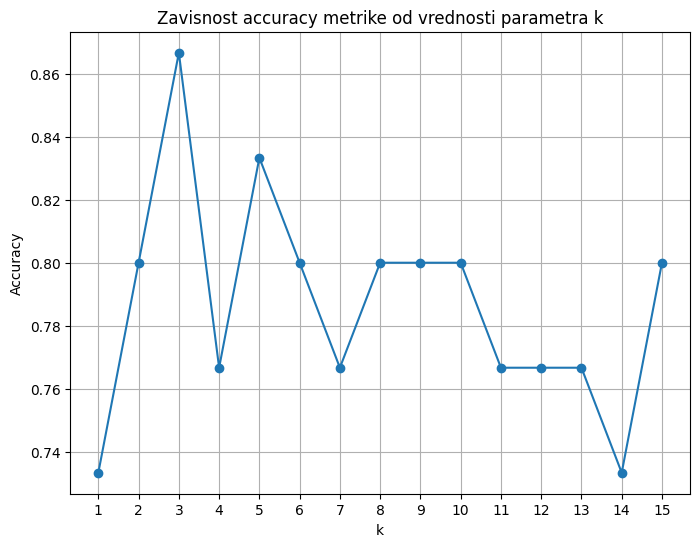

In [ ]:
class KNN:

    def __init__(self, nb_features, nb_classes, data, k, weighted=False):
        self.nb_features = nb_features
        self.nb_classes = nb_classes
        self.k = k
        self.weighted = weighted
        self.X = tf.convert_to_tensor(data['x'], dtype=tf.float32)
        self.Y = tf.convert_to_tensor(data['y'], dtype=tf.int32)

    def predict(self, query_data):
        nb_queries = len(query_data['x'])
        matches = 0
        for i in range(nb_queries):
            dists = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(self.X, query_data['x'][i])), axis=1))
            _, idxs = tf.nn.top_k(-dists, self.k)
            classes = tf.gather(self.Y, idxs)
            dists = tf.gather(dists, idxs)

            if self.weighted:
                w = 1 / dists
                w = tf.where(tf.math.is_inf(w), 0, w)  # Izbegavanje deljenja sa nulom
            else:
                w = tf.fill([self.k], 1/self.k)

            w_col = tf.reshape(w, (self.k, 1))
            classes_one_hot = tf.one_hot(classes, self.nb_classes)
            scores = tf.reduce_sum(w_col * classes_one_hot, axis=0)

            hyp = tf.argmax(scores)
            if query_data['y'] is not None:
                actual = query_data['y'][i]
                match = (hyp == actual)
                if match:
                    matches += 1
                if i % 10 == 0:
                    print(f'Test example: {i+1}/{nb_queries} | Predicted: {hyp} | Actual: {actual} | Match: {match}')

        accuracy = matches / nb_queries
        return accuracy

filename = 'iris.csv'
all_data = pd.read_csv(filename, usecols=['sepal_length','sepal_width', 'species'])
all_data_wn = all_data.dropna(ignore_index=True)

# features (X), target variable (Y)
X = all_data_wn[['sepal_length', 'sepal_width']].values
Y = pd.Categorical(all_data_wn['species']).codes

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

# delimo podatke na trening i test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

k_values = list(range(1, 16))

accuracies = []
for k in k_values:
    train_data = {'x': X_train, 'y': y_train}
    knn = KNN(nb_features=2, nb_classes=3, data=train_data, k=k, weighted=False)
    accuracy = knn.predict({'x': X_test, 'y': y_test})
    accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy}')

# accuracy zavisi od parametra k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('zavisnost accuracy-ja od vrednosti parametra k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
# najbolji izbor je k=3
